# Data Analysis on Yelp Business Dataset

In [7]:
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import the cleaned Business data:

In [2]:
df = pd.read_feather("data/yelp_business_cleaned.feather")
print(f"There are {df.shape[0]} business records left with {df.shape[1]} total features.")
df.head(3)

There are 68054 business records left with 84 total features.


,original_index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,music_live,music_video,music_karaoke,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,...,None,None,None,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
1,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,...,None,None,None,closed,closed,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
2,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,...,None,None,None,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68054 entries, 0 to 68053
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   original_index              68054 non-null  int64  
 1   business_id                 68054 non-null  object 
 2   name                        68054 non-null  object 
 3   address                     68054 non-null  object 
 4   city                        68054 non-null  object 
 5   state                       68054 non-null  object 
 6   postal_code                 68054 non-null  object 
 7   latitude                    68054 non-null  float64
 8   longitude                   68054 non-null  float64
 9   stars                       68054 non-null  float64
 10  review_count                68054 non-null  int64  
 11  is_open                     68054 non-null  int64  
 12  attributes                  68054 non-null  object 
 13  categories                  680

# Exploratory Data Analysis

<!-- ![Number of business records by state](Figures/map_numrecords_by_state.png | width=100) -->
<img src="Figures/map_numrecords_by_state.png"  width="800" >

In [6]:
df[['stars', 'review_count']].describe()

,stars,review_count
count,68054.000000,68054.000000
mean,3.563949,74.619861
std,0.851437,169.900997
min,1.000000,5.000000
25%,3.000000,11.000000
50%,3.500000,27.000000
75%,4.000000,73.000000
max,5.000000,7568.000000


Text(0.5, 0, 'Number of Reviews')

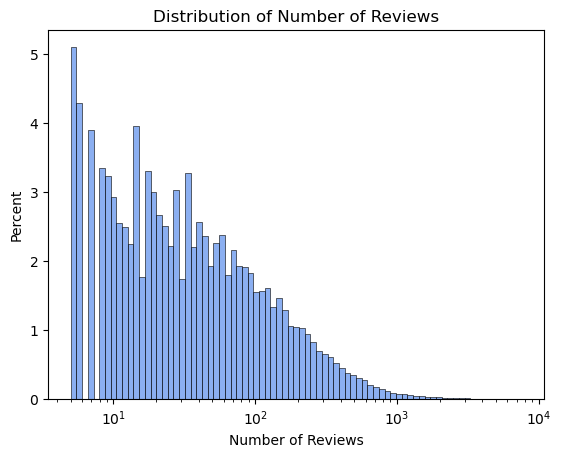

In [171]:
sns.histplot(data = df, x = 'review_count', 
             color = 'cornflowerblue', stat = 'percent',
             log_scale = True)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")

In [189]:
df.groupby(['stars'])[['business_id']].agg('count').reset_index().astype({'stars': str})

,stars,business_id
0,1.0,311
1,1.5,1800
2,2.0,3813
3,2.5,6109
4,3.0,9436
5,3.5,14423
6,4.0,16950
7,4.5,12034
8,5.0,3178


Text(0, 0.5, 'Number of restaurants')

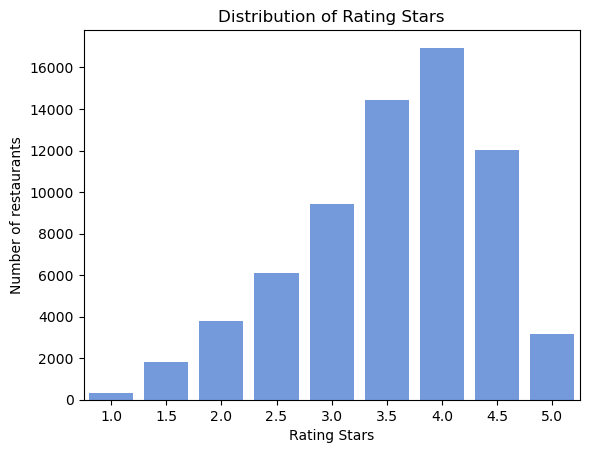

In [186]:
sns.barplot(data = df.groupby(['stars'])[['business_id']].agg('count').reset_index().astype({'stars': str}),
            x = 'stars', 
            y = 'business_id',
            color = 'cornflowerblue')
plt.title("Distribution of Rating Stars")
plt.xlabel("Rating Stars")
plt.ylabel("Number of restaurants")

In [169]:
df[df['review_count'] > 1000]['review_count']

74       2404
87       1639
438      2064
888      2062
1082     2126
         ... 
66915    3054
67146    1232
67185    1213
67343    4207
67583    2679
Name: review_count, Length: 303, dtype: int64

### Proportion of businesses that are still open (in operation)

In [156]:
in_oper = df['is_open'].value_counts(normalize = True, sort = True, dropna = False)
in_oper = in_oper.to_frame().reset_index()
in_oper.rename(columns = {'is_open': 'proportion', 'index' : 'in operation'}, inplace = True)
in_oper['in operation'] = in_oper['in operation'].map({1: "Yes", 0: "No"})
in_oper['proportion'] = in_oper['proportion'] * 100
in_oper

,in operation,proportion
0,Yes,69.430158
1,No,30.569842


Text(0, 0.5, 'Percentage (%)')

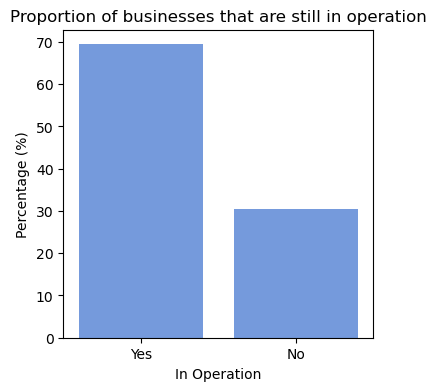

In [157]:
fig, ax = plt.subplots(figsize = (4, 4))
sns.barplot(data = in_oper,
            x = 'in operation', y = "proportion", 
            order = ['Yes', 'No'],
            color = "cornflowerblue")
plt.title("Proportion of businesses that are still in operation")
plt.xlabel("In Operation")
plt.ylabel("Percentage (%)")

### Price Ranges

In [149]:
label_map = {"1": "under $10",
             "2": "$11-30",
             "3": "$31-60",
             "4": "over $61",
             "None": "N/A"}
# df['RestaurantsPriceRange2'].map(label_map).value_counts(normalize = True, sort = True)
priceranges = df['RestaurantsPriceRange2'].map(label_map).value_counts(normalize = True, sort = True, dropna = False)
priceranges = priceranges.to_frame().reset_index()
priceranges.rename(columns = {'RestaurantsPriceRange2': 'proportion', 'index' : 'price range'}, inplace = True)
priceranges['proportion'] = priceranges['proportion'] * 100
priceranges

,price range,proportion
0,$11-30,44.632204
1,under $10,36.506304
2,N/A,14.927851
3,$31-60,3.466365
4,over $61,0.467276


Text(0.5, 0, 'Percentage (%)')

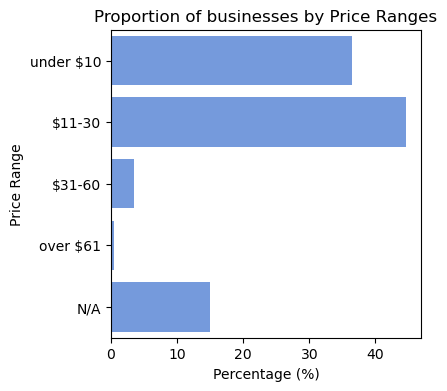

In [153]:
fig, ax = plt.subplots(figsize = (4, 4))
sns.barplot(data = priceranges,
            y = 'price range', x = "proportion", 
            order = ["under $10", "$11-30", "$31-60", "over $61", "N/A"],
            color = "cornflowerblue")
plt.title("Proportion of businesses by Price Ranges")
plt.ylabel("Price Range")
plt.xlabel("Percentage (%)")

### Opening 24 hours

In [141]:
open24h = df['Open24Hours'].value_counts(normalize = True, sort = True, dropna = False)
open24h = open24h.to_frame().reset_index()
open24h.rename(columns = {'Open24Hours': 'proportion', 'index' : 'Open 24 Hr'}, inplace = True)
open24h['Open 24 Hr'] = open24h['Open 24 Hr'].map({"True": "Yes", "False": "No", "None": "N/A"})
open24h['proportion'] = open24h['proportion'] * 100
open24h

,Open 24 Hr,proportion
0,N/A,99.961795
1,No,0.024980
2,Yes,0.013225


Text(0, 0.5, 'Percentage (%)')

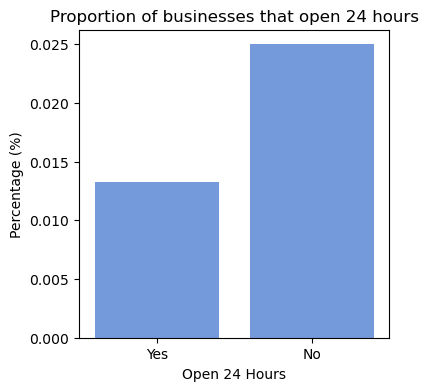

In [148]:
fig, ax = plt.subplots(figsize = (4, 4))
sns.barplot(data = open24h[open24h['Open 24 Hr'] != "N/A"],
            x = 'Open 24 Hr', y = "proportion", 
            order = ['Yes', 'No'],
            color = "cornflowerblue")
plt.title("Proportion of businesses that open 24 hours")
plt.xlabel("Open 24 Hours")
plt.ylabel("Percentage (%)")

### Parking availability

In [68]:
df['has_parking'] = df[['parking_garage', 'parking_street', 
                        'parking_validated', 'parking_lot', 
                        'parking_valet']].replace({"None": np.nan,
                                                "True": 1, 
                                                "False": 0}).max(axis = 1)
parking_stat = df['has_parking'].value_counts(dropna = False, normalize = True).to_frame().reset_index()
parking_stat.rename(columns = {'has_parking': 'proportion', 'index' : 'has_parking'}, inplace = True)
parking_stat['has_parking'] = parking_stat['has_parking'].map({1: "Yes", 0: "No"})
parking_stat['has_parking'].fillna("N/A", inplace = True)
parking_stat['proportion'] = parking_stat['proportion'] * 100
parking_stat

,has_parking,proportion
0,Yes,63.730273
1,No,23.194816
2,N/A,13.074911


Text(0, 0.5, 'Percentage')

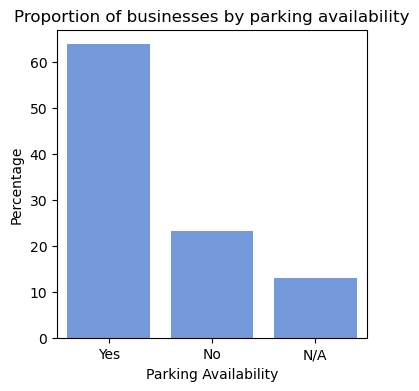

In [76]:
fig, ax = plt.subplots(figsize = (4, 4))
sns.barplot(data = parking_stat,
            x = 'has_parking', y = "proportion",
            color = "cornflowerblue")
plt.title("Proportion of businesses by parking availability")
plt.xlabel("Parking Availability")
plt.ylabel("Percentage")

### Diet types

In [135]:
diets = df[['diet_dairy-free',
                        'diet_gluten-free',
                        'diet_vegan',
                        'diet_kosher',
                        'diet_halal',
                        'diet_soy-free',
                        'diet_vegetarian']].replace({"None": np.nan,
                                                "True": 1, 
                                                "False": 0})
val_count_list = []
for d in list(diets.columns):
    count = diets[d].value_counts(dropna = False, normalize = True).to_frame()
    val_count_list.append(count)
diets_counts = pd.concat(val_count_list, axis = 1)
diets_counts.reset_index(inplace = True)
diets_counts['index'] = diets_counts['index'].map({1: "Yes", 0: "No"})
diets_counts['index'].fillna("N/A", inplace = True)
diets_counts = diets_counts.melt(id_vars = ['index'], 
                                 var_name = "diet type",
                                 value_name = 'proportion'
                                 )
diets_counts = diets_counts[diets_counts['index'] != "N/A"]
diets_counts['proportion'] = diets_counts['proportion'] * 100
diets_counts['diet type'] = diets_counts['diet type'].str.replace("diet_", "")
diets_counts.sort_values(["index", "proportion"], ascending = [False, False], inplace = True)
diets_counts

,index,diet type,proportion
5,Yes,gluten-free,0.027919
20,Yes,vegetarian,0.022041
8,Yes,vegan,0.020572
2,Yes,dairy-free,0.008817
17,Yes,soy-free,0.005878
14,Yes,halal,0.001469
11,Yes,kosher,NaN
10,No,kosher,0.044083
13,No,halal,0.042613
16,No,soy-free,0.038205


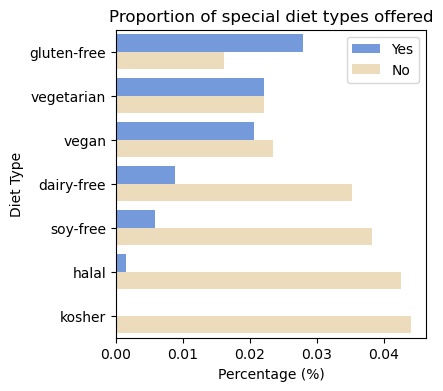

In [137]:
fig, ax = plt.subplots(figsize = (4, 4))
sns.barplot(data = diets_counts,
            x = 'proportion', y = "diet type",
            hue = 'index',
            palette = ["cornflowerblue", "wheat"])
plt.title("Proportion of special diet types offered")
plt.xlabel("Percentage (%)")
plt.ylabel("Diet Type")
plt.legend(title = "")

### Allowing Dogs

In [138]:
df['DogsAllowed'].value_counts()

None     54316
False    10037
True      3701
Name: DogsAllowed, dtype: int64

In [159]:
dog_allow = df['DogsAllowed'].value_counts(normalize = True, sort = True, dropna = False)
dog_allow = dog_allow.to_frame().reset_index()
dog_allow.rename(columns = {'DogsAllowed': 'proportion', 'index' : 'Allowing dogs'}, inplace = True)
dog_allow['Allowing dogs'] = dog_allow['Allowing dogs'].map({"True": "Yes", "False": "No", "None": "N/A"})
dog_allow['proportion'] = dog_allow['proportion'] * 100
dog_allow

,Allowing dogs,proportion
0,N/A,79.813090
1,No,14.748582
2,Yes,5.438328


Text(0, 0.5, 'Percentage (%)')

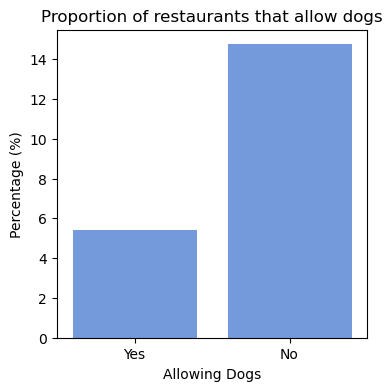

In [161]:
fig, ax = plt.subplots(figsize = (4, 4))
sns.barplot(data = dog_allow[dog_allow['Allowing dogs'] != "N/A"],
            x = 'Allowing dogs', y = "proportion", 
            order = ['Yes', 'No'],
            color = "cornflowerblue")
plt.title("Proportion of restaurants that allow dogs")
plt.xlabel("Allowing Dogs")
plt.ylabel("Percentage (%)")